# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)

# Loop through the list of cities and perform a request for data on each
cities_existed = []
cityid = []
country = []
lat = []
lon=[]
temp = []
humid = []
cloud = []
wind = []

i = 0

for city in cities:
    response = requests.get(query_url + city).json()
    # pprint(response)
    i+=1
    try:
        cityid.append(response['id'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        cities_existed.append(city)
    except KeyError:
        print(str(i) + ': ' + city + ' missing')


8: sentyabrskiy missing
23: mys shmidta missing
36: dolbeau missing
42: attawapiskat missing
62: phan rang missing
63: illoqqortoormiut missing
76: grand river south east missing
88: taolanaro missing
116: kerki missing
122: tlahualilo missing
123: barentsburg missing
151: belushya guba missing
165: bababe missing
170: tsihombe missing
188: miranorte missing
198: umm jarr missing
201: ye missing
213: mahadday weyne missing
220: karamea missing
222: samusu missing
236: amderma missing
248: tumannyy missing
285: viligili missing
290: suao missing
319: barbar missing
329: komyshnya missing
345: mixtequilla missing
352: palabuhanratu missing
353: kamenskoye missing
371: skalistyy missing
379: ijaki missing
390: bur gabo missing
394: thilogne missing
407: bolungarvik missing
428: vaitupu missing
431: tidore missing
432: igarape-acu missing
433: sedelnikovo missing
462: nizhneyansk missing
467: burica missing
480: paradwip missing
486: louisbourg missing
506: abu jubayhah missing
523: scotts

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
len(cities_existed)

In [9]:
weather_dict = {
    "City": cities_existed,
    "CityID":cityid,
    "Country":country,
    "Lat": lat,
    "Long":lon,
    "temp": temp,
    "humidity": humid,
    "cloudiness": cloud,
    "wind speed": wind
}

weather_data = pd.DataFrame(weather_dict).set_index("City")
weather_data.to_csv("WeatherPy.csv")
print(len(weather_data))
weather_data.head()

565


,CityID,Country,Lat,Long,temp,humidity,cloudiness,wind speed
City,,,,,,,,
araure,3649017,VE,9.56,-69.21,92.64,34,90,1.05
busselton,2075265,AU,-33.65,115.33,60.98,79,100,24.92
alofi,4036284,NU,-19.06,-169.92,82.40,78,40,10.29
beringovskiy,2126710,RU,63.05,179.32,19.74,96,100,17.29
khatanga,2022572,RU,71.97,102.50,9.54,93,0,5.06


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

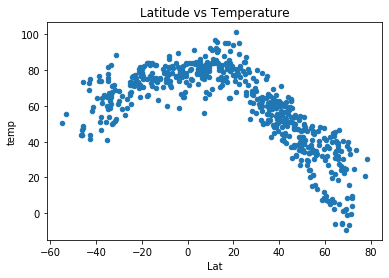

<Figure size 432x288 with 0 Axes>

In [33]:
weather_data.plot(kind = "scatter",x='Lat',y='temp')
plt.title("Latitude vs Temperature")
plt.show()
plt.savefig("Latitude_Temperature.png")



#### Latitude vs. Humidity Plot

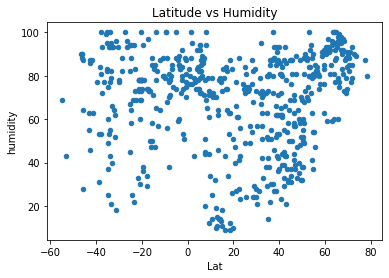

In [37]:
weather_data.plot(kind = "scatter",x='Lat',y='humidity')
plt.title("Latitude vs Humidity")
plt.savefig("Latitude_Humidity.png")
plt.show()



#### Latitude vs. Cloudiness Plot

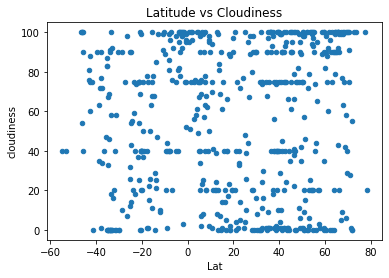

In [36]:
weather_data.plot(kind = "scatter",x='Lat',y='cloudiness')
plt.title("Latitude vs Cloudiness")
plt.savefig("Latitude_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

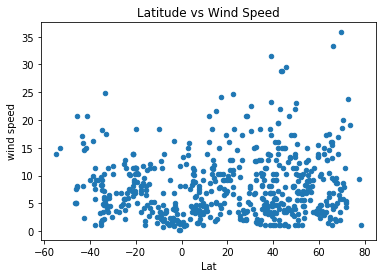

In [38]:
weather_data.plot(kind = "scatter",x='Lat',y='wind speed')
plt.title("Latitude vs Wind Speed")
plt.savefig("Latitude_Wind Speed.png")
plt.show()



Theee Observable trend

1) As the latitude goes far away from zero, the temperature goes down. In the chart, the temperature around latitude zero seems to be highest and it goes down as it goes away from zero.

2) The Humidity does not seem to have any correlation between latitude. As humidity is affected by water near the place, the relationship may be clear when longitude is considered.

3) The relationship between cloudness and latitude is not clear since cities with same latitude have very diverse cloudiness. Also the relationship between wind speed and latitude was not clear as there were many cities with same wind speed but different latitude.

4) The correlation between temperature and latitude seem to be clear since R-value is 0.78, close to 1.


## Linear Regression

In [39]:
# OPTIONAL: Create a function to create Linear Regression plots

# Perform a linear regression on temperature vs. latitude
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    regress_values = x * slope + intercept
    return rvalue, slope, intercept, regress_values

# Get regression values
print(regress_values)

City
busselton    64.587685
alofi        72.175173
hermanus     64.187249
hithadhoo    81.775244
rikitea      70.063782
               ...    
esperance    64.473275
chimbote     77.360043
gamba        80.709147
kirakira     76.652779
kyaka        81.437213
Name: Lat, Length: 175, dtype: float64


In [12]:
# Create Northern and Southern Hemisphere DataFrames
north = weather_data[weather_data['Lat']>0]
south = weather_data[weather_data['Lat']<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

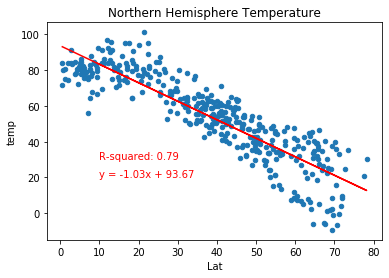

In [45]:
north.plot(kind = "scatter",x='Lat',y='temp')
rvalue, slope, intercept, regress_values = linear_regression(north['Lat'], north['temp'])
plt.plot(north['Lat'], regress_values, color = 'r')

plt.title("Northern Hemisphere Temperature")

#Show linear regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(10, 20),color = 'red')

# Print r square value
plt.annotate(f"R-squared: {round(rvalue**2,2)}",(10,30),color = 'red')

plt.savefig("NH_temp.png")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

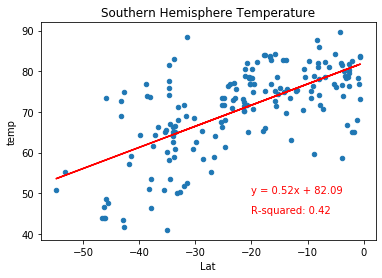

In [47]:
south.plot(kind = "scatter",x='Lat',y='temp')

rvalue, slope, intercept, regress_values = linear_regression(south['Lat'], south['temp'])
plt.plot(south['Lat'], regress_values, color = 'r')

line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq,(-20, 50),color = 'red')

# Print r square value
plt.annotate(f"R-squared: {round(rvalue**2,2)}",(-20,45),color = 'red')

plt.title("Southern Hemisphere Temperature")
plt.savefig("SH_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

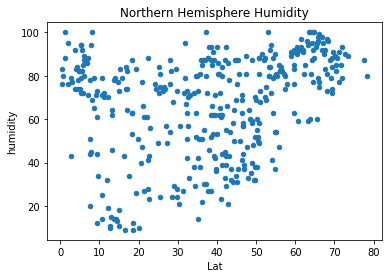

In [27]:
north.plot(kind = "scatter",x='Lat',y='humidity')
plt.title("Northern Hemisphere Humidity")
plt.savefig("NHHumid.png")
plt.show()
#The relationship between humidity and latitude is not clear.


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

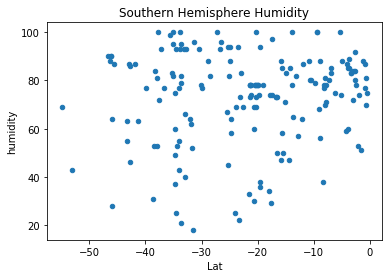

In [28]:
south.plot(kind = "scatter",x='Lat',y='humidity')
plt.title("Southern Hemisphere Humidity")
plt.savefig("SHHumid.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

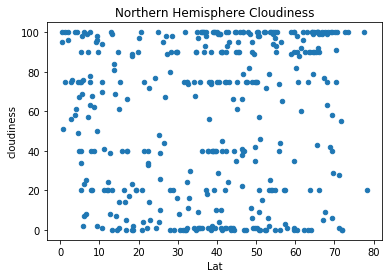

In [29]:
north.plot(kind = "scatter",x='Lat',y='cloudiness')
plt.title("Northern Hemisphere Cloudiness")
plt.savefig("NHCloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

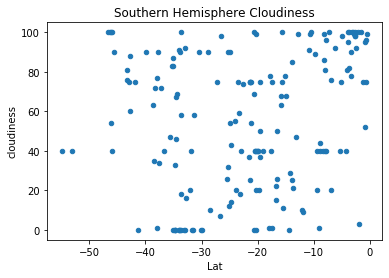

In [30]:
south.plot(kind = "scatter",x='Lat',y='cloudiness')
plt.title("Southern Hemisphere Cloudiness")
plt.savefig("SHCloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

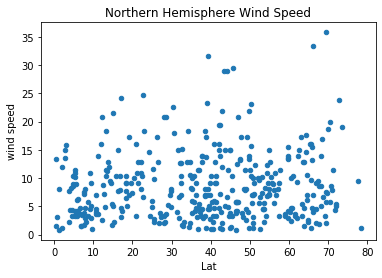

In [31]:
north.plot(kind = "scatter",x='Lat',y='wind speed')
plt.title("Northern Hemisphere Wind Speed")
plt.savefig("NHWind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

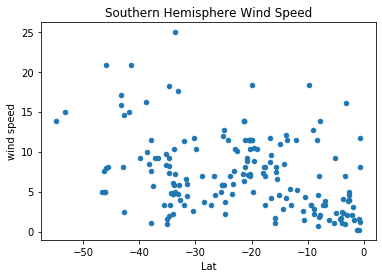

In [32]:
south.plot(kind = "scatter",x='Lat',y='wind speed')
plt.title("Southern Hemisphere Wind Speed")
plt.savefig("SHWind.png")
plt.show()